In [134]:
import pandas as pd
import os
import gzip
import re
%matplotlib inline

In [5]:
!gunzip -c /data/cellardata/users/btsui/dbsnp/Homo_sapiens/All_20170710.vcf.gz| head -n 20


##fileformat=VCFv4.0
##fileDate=20170710
##source=dbSNP
##dbSNP_BUILD_ID=150
##reference=GRCh38.p7
##phasing=partial
##variationPropertyDocumentationUrl=ftp://ftp.ncbi.nlm.nih.gov/snp/specs/dbSNP_BitField_latest.pdf	
##INFO=<ID=RS,Number=1,Type=Integer,Description="dbSNP ID (i.e. rs number)">
##INFO=<ID=RSPOS,Number=1,Type=Integer,Description="Chr position reported in dbSNP">
##INFO=<ID=RV,Number=0,Type=Flag,Description="RS orientation is reversed">
##INFO=<ID=VP,Number=1,Type=String,Description="Variation Property.  Documentation is at ftp://ftp.ncbi.nlm.nih.gov/snp/specs/dbSNP_BitField_latest.pdf">
##INFO=<ID=GENEINFO,Number=1,Type=String,Description="Pairs each of gene symbol:gene id.  The gene symbol and id are delimited by a colon (:) and each pair is delimited by a vertical bar (|)">
##INFO=<ID=dbSNPBuildID,Number=1,Type=Integer,Description="First dbSNP Build for RS">
##INFO=<ID=SAO,Number=1,Type=Integer,Description="Variant Allele Origin: 0 - unspecified, 1 - Germline, 2 - Somat

In [26]:
specie='Mus_musculus'

In [119]:
#ftp://ftp.ncbi.nlm.nih.gov/snp/organisms/mouse_10090/VCF/00-All.vcf.gz
pattern='VP=\d{2}(\d{4})'
#pattern2='VP=\w{18}(\d{2})'
#pattern='VP=050000000005000000000100'
prog2 = re.compile(pattern)
inDbDir='/data/cellardata/users/btsui/dbsnp/'+specie+'/00-All.vcf.gz'
outDbDir=inDbDir.replace('.vcf.gz','.f1_byte2_not_00.vcf.gz')

### identify snps with reference

In [754]:
#!gunzip -c /data/cellardata/users/btsui/dbsnp/Homo_sapiens/All_20170710.vcf.gz | head -n 100

In [120]:
"""
byte: 8 bit
256
#10 at F2
"""
f1_byte2

'0000'

In [121]:
'1\t3000020\trs1133275841\tT\tA\t.\t.\tRSPOS=3000020;dbSNPBuildID=150;SAO=0;VC=snp;VP=050000000005000000000100\n'

'1\t3000020\trs1133275841\tT\tA\t.\t.\tRSPOS=3000020;dbSNPBuildID=150;SAO=0;VC=snp;VP=050000000005000000000100\n'

In [122]:

###
TEST=True
j=0
with gzip.open(inDbDir, 'rb') as f:
    with gzip.open(outDbDir,'wb') as wf:
        for i,l in enumerate(f):
            if l[0]!='#':
                f1_byte2=prog.findall(l)[0]
                if f1_byte2!='0000':
                    j+=1
                    wf.write(l)
            if TEST and (i>10**6):
                break
            if (i%(10**6))==0:
                print i,j

0 0
1000000 621


161747


In [127]:
print i

81432284


In [144]:
161747/81432284.0

0.001986276106414994

### identify snp window

In [185]:

tmpDf=pd.read_csv(outDbDir,sep='\t',header=None)
tmpDf.columns=['Chr','Loc','rs','REF','ALT','','','Annot']

In [267]:
#65158616-65186500
#chr1:65170978-65170978
#tmpDf[(tmpDf['Chr']=='1')&((tmpDf['Start']>65158616)&(tmpDf['End']<65186500))]

In [ ]:
#Chr1:65158616

In [186]:
### take only the non-
#give it 1000
window_size=1000
tmpDf['Start']=tmpDf['Loc']-window_size
tmpDf.loc[(tmpDf['Start']<0),'Start']=0
tmpDf['End']=tmpDf['Loc']+window_size


In [198]:
myCleanFaDir='/cellar/users/btsui/Data/ensembl/clean/'+specie+'.fa'
os.system(' samtools faidx '+ myCleanFaDir)

0

In [200]:
#bedtools complement -i <BED/GFF/VCF> -g <GENOME>
myFai=pd.read_csv(myCleanFaDir+'.fai',sep='\t',header=None)

In [205]:
FaOrder=myFai[0].unique()

In [212]:
tmpDf['Chr']=tmpDf['Chr'].astype(dtype="category",categories=FaOrder,ordered=True)

tmpDf2=tmpDf[['Chr','Start','End']].sort_values(['Chr','Start','End'])
tmpDf2.to_csv('extracting_region.bed',sep='\t',header=None,index=None)

In [215]:
#tmpDf2.Chr.unique()

In [216]:
myFai[[0,1]].to_csv('genome',sep='\t',header=None,index=None)

In [217]:
!head /cellar/users/btsui/Data/ensembl/clean/Mus_musculus.fa.fai

1	195471971	59	60	61
2	182113224	198729956	60	61
3	160039680	383878460	60	61
4	156508116	546585527	60	61
5	151834684	705702171	60	61
6	149736546	860067493	60	61
7	145441459	1012299708	60	61
8	129401213	1160165251	60	61
9	124595110	1291723210	60	61
10	130694993	1418394967	60	61


In [218]:
#!bedtools complement --help

In [219]:
!bedtools complement -i extracting_region.bed -g genome > complement.txt

### mask out the rest of the genome

In [220]:
complementDf=pd.read_csv('complement.txt',sep='\t',header=None)

In [557]:
#complementDf.shape

In [227]:
tmpDf[['Chr','Loc','Loc']].to_csv('/data/cellardata/users/btsui/dbsnp/snp_beds/'+specie+'.bed',
                                  sep='\t',header=None,index=None)

In [269]:
!echo /data/cellardata/users/btsui/dbsnp/snp_beds/Homo_sapiens.bed

/data/cellardata/users/btsui/dbsnp/snp_beds/Homo_sapiens.bed


In [232]:
#!wc -l /data/cellardata/users/btsui/dbsnp/snp_beds/Homo_sapiens.bed

In [233]:
!rm pipe
!mkfifo pipe

In [234]:
import os

In [235]:
os.system('maskFastaFromBed -fi /cellar/users/btsui/Data/ensembl/clean/'+specie+'.fa -bed complement.txt -fo pipe &')

0

In [236]:
outDir='/cellar/users/btsui/Data/ensembl/snp_masked/'

In [237]:
os.system('gzip -c pipe > '+outDir+specie+'.fa.gz')

0

### combine with microbe

In [238]:
#'microbe.fa.gz'

In [239]:
inDir=outDir+specie+'.fa.gz'
withMicrobeDir=inDir.replace('.fa.gz','.microbe.fa.gz')

In [240]:
os.system('cat microbe.fa.gz '+inDir+' >'+withMicrobeDir)

0

In [246]:
#withMicrobeDir

In [249]:
os.mkdir('/cellar/users/btsui/Data/BOWTIE_GENOME_SNP_INDEX/'+specie)

OSError: [Errno 17] File exists: '/cellar/users/btsui/Data/BOWTIE_GENOME_SNP_INDEX/Mus_musculus'

In [251]:
myDir='/cellar/users/btsui/Data/BOWTIE_GENOME_SNP_INDEX/'+specie+'/bowtie2'

faDir=withMicrobeDir


cmd= '/cellar/users/btsui/Program/bowtie2-2.3.4-linux-x86_64/bowtie2-build --threads 4 '+faDir+' '+myDir
#os.system('rm -r '+myDir)
#os.system('mkdir '+myDir)
os.system(cmd)

0

In [252]:
#!bowtie2-build --threads 4 /cellar/users/btsui/Data/ensembl/snp_masked/Mus_musculus.microbe.fa.gz /cellar/users/btsui/Data/BOWTIE_GENOME_SNP_INDEX/Mus_musculus/bowtie2

# scratch

In [94]:
#!rm /cellar/users/btsui/Data/ensembl/snp_masked/*

In [67]:
#run bowtie 
myDir='/cellar/users/btsui/Data/BOWTIE_GENOME_SNP_INDEX/'+specie+'/'
faDir='/cellar/users/btsui/Data/ensembl/snp_masked/Homo_sapiens.GRCh38.dna_rm.toplevel.SNP_masked.fa'
cmd= 'bowtie2-build --threads 48 '+faDir+' '+myDir
cmd

'bowtie2-build --threads 48 /cellar/users/btsui/Data/ensembl/snp_masked/Homo_sapiens.GRCh38.dna_rm.toplevel.SNP_masked.fa /cellar/users/btsui/Data/BOWTIE_GENOME_SNP_INDEX/Homo_sapiens/'

In [68]:
#!cp Homo_sapiens.GRCh38.dna_rm.toplevel.SNP_masked.fa /cellar/users/btsui/Data/ensembl/snp_masked/.


In [282]:
#IDH1
"""
Chromosome:2
Start:208,236,227 bp from pterEnd:208,266,074 bp from pter

"""

"""
subDf=complementDf[(complementDf.Chr=='2')]
subDf['dist_idh']=(subDf['Start']-208236227).abs()
subDf.sort_values('dist_idh')"""

"\nsubDf=complementDf[(complementDf.Chr=='2')]\nsubDf['dist_idh']=(subDf['Start']-208236227).abs()\nsubDf.sort_values('dist_idh')"

In [262]:
spaceMasked=(complementDf.End-complementDf.Start)

In [265]:
np.log10((spaceMasked.sum()))

10.705346589807313

In [267]:
import cPickle as pickle
import bz2

db = pickle.load(bz2.BZ2File('db_v20/mpa_v20_m200.pkl', 'r'))

50739547498

In [306]:
from Bio import SeqIO

In [270]:

record = SeqIO.read("single.fasta", "fasta")

0.9934342390348803

In [34]:
#!cp  ./Homo_sapiens.GRCh38.dna_rm.toplevel.SNP_masked.fa.gz /cellar/users/btsui/Data/ensembl/snp_masked/

In [750]:
from Bio import SeqIO
import gzip
maskedFasta=outDir+specie+'.fa.gz'
unmaskedFasta='/cellar/users/btsui/Data/ensembl/release/fasta/Homo_sapiens.GRCh38.dna_rm.toplevel.fa'
with open(unmaskedFasta, "r") as handle:
    for human_record in SeqIO.parse(handle, "fasta") :
        print(human_record.id)
        if human_record.id=='1':
                break
     

1


In [718]:
from Bio import SeqIO
import gzip
#maskedFasta=outDir+'Hm'+'.fa.gz'
unmaskedFasta='/cellar/users/btsui/Data/ensembl/clean/Mus_musculus.fa'
with open(unmaskedFasta, "r") as handle:
    for mouse_record in SeqIO.parse(handle, "fasta") :
        print(mouse_record.id)
        if mouse_record.id=='1':
                break
     

1


In [753]:
human_record[10177]

'N'

In [692]:
"""
#human 2:208248388..208248388,
#mouse chr1	65170978	65170979	60497

1	10177
"""        
mouse_record   

'\n#human chr1\t14727\t14728\t0\n#mouse chr17\t66119103\t66119104\t0\n'

In [727]:
i=65170978
#
str(mouse_record.seq)[i-30:i+30]

'AATGACTTACTTGGTCCCCATATGCATGTCGGCCAATGATGATGGGTTTTACCCAGCCTG'

In [720]:
from Bio import Seq

In [741]:
i=208248388
(str(human_record.seq)[i-30:i+30])
human_record.seq[i]

'G'

In [733]:
## G➞A


''

In [732]:
(str(human_record.seq)[(i-2):(i+2)])

'ACGA'

In [739]:
i=65170978
#Seq.reverse_complement(str(human_record.seq)[i-20:i+20])
(mouse_record.seq[i])

'G'

In [364]:
str(record.seq)[i-10:i+10]

'TAAGCATGACGACCTATGAT'

In [113]:
proteome='/cellar/users/btsui/Downloads/viral.2.protein.faa'
with open(proteome) as handle:
    for record in SeqIO.parse(handle, "fasta") :
        print (len(record))*3
        break

3660


In [114]:
record

SeqRecord(seq=Seq('MAVNTSGKTRLPQPASEDYTQYARNTLKNLNNVYEKFAVRGPVLALVRPAQFSK...GAV', SingleLetterAlphabet()), id='YP_003620396.1', name='YP_003620396.1', description='YP_003620396.1 p130 [Providence virus]', dbxrefs=[])

In [115]:
!ls -lah /cellar/users/btsui/Downloads/viral.2.protein.faa

-rw-r--r-- 1 btsui users 19M Dec 30 13:25 /cellar/users/btsui/Downloads/viral.2.protein.faa


#### create ids for the bed

In [559]:
import pandas as pd
import numpy as np

In [579]:
tmpBedDf=pd.read_csv('/data/cellardata/users/btsui/dbsnp/snp_beds/Homo_sapiens.bed',header=None,sep='\t')

In [580]:
tmpBedDf[0].astype(np.str).unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y', 'MT'], dtype=object)

In [707]:
208248388

208248388

In [582]:
tmpBedDf.columns=['Chr','Pos','']
tmpBedDf['Chr']=tmpBedDf['Chr'].astype(np.str)
tmpBedDf['Pos']=tmpBedDf['Pos'].astype(np.str)
#tmpBedDf['Chr_Pos']=tmpBedDf['Chr']+'-'+tmpBedDf['Pos']

In [583]:
tmpBedDf['Id']=tmpBedDf.index

In [585]:
#tmpBedDf[['Chr_Pos','Id']].drop_duplicates(['Chr_Pos']).to_pickle('/data/cellardata/users/btsui/dbsnp/snp_beds/Homo_sapiens_chrom_pos__id.pickle')

In [589]:
#tmpBedDf

In [590]:
#index=tmpDf.Chr.value_counts()

In [591]:
#index.astype(np.str)

In [592]:
specie='Homo_sapiens'

In [593]:
myBedDir='/data/cellardata/users/btsui/dbsnp/snp_beds/'+specie+'.bed'

In [657]:
myBedDf=pd.read_csv(myBedDir,sep='\t',header=None)

In [658]:
myBedDf[3]=myBedDf.index

In [659]:
import numpy as np

In [660]:
window=1

In [661]:
myBedDf[0]='chr'+myBedDf[0].astype(np.str)
myBedDf[2]=myBedDf[2]+window

In [662]:
#myBedDf[1]

In [663]:
myBedDf.head()

,0,1,2,3
0,chr1,14727,14728,0
1,chr1,630825,630826,1
2,chr1,630833,630834,2
3,chr1,817186,817187,3
4,chr1,833068,833069,4


In [664]:
#ucscOutS.head(n=1000).to_csv('tmp.bed',sep='\t',header=None,index=None)

In [710]:
myBedDf[myBedDf[1]==208248388].head(n=1000).to_csv('tmp.bed',sep='\t',header=None,index=None)

In [715]:
myBedDf[myBedDf[1]==208248388]

,0,1,2,3
60497,chr2,208248388,208248389,60497


In [711]:
#!~/liftOver

In [712]:
!~/liftOver -minMatch=0.2 ./tmp.bed ~/hg38ToMm10.over.chain ./tmp.out.100.bed unMapped

Reading liftover chains
Mapping coordinates


In [713]:
!head ./tmp.bed

chr2	208248388	208248389	60497


In [682]:
oneBase=pd.read_csv('./tmp.out.100.bed',header=None,sep='\t').set_index(3)[1]

In [716]:
!head ./tmp.out.100.bed

chr1	65170978	65170979	60497


In [675]:
!head tmp.out.100.bed

chr17	66119103	66119104	0
chrM	5086	5087	1
chrM	5095	5096	2
chr4	156244134	156244135	8
chr4	156239437	156239438	9
chr4	156225155	156225156	10
chr4	156199911	156199912	12
chr4	156199826	156199827	13
chr4	156199738	156199739	14
chr4	156199695	156199696	15


In [678]:
pd.read_csv('./tmp.out.100.bed',header=None,sep='\t').head()


,0,1,2,3
0,chr17,66119103,66119104,0
1,chrM,5086,5087,1
2,chrM,5095,5096,2
3,chr4,156244134,156244135,8
4,chr4,156239437,156239438,9


In [553]:
tmpDf=pd.DataFrame({'one':oneBase,'hundred':hundredBase})

In [554]:
%matplotlib inline
import seaborn as sns

In [555]:
tmpS=(tmpDf['hundred']-tmpDf['one']).abs()
tmpS.value_counts()

1.0            734
124878053.0      1
99.0             1
100.0            1
dtype: int64

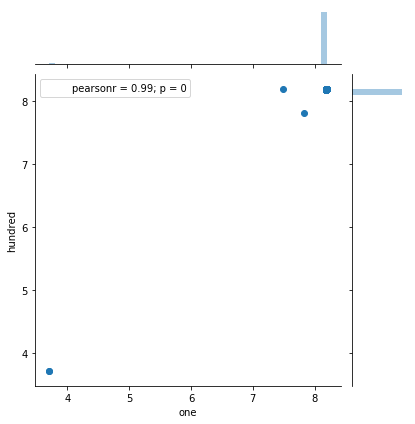

In [556]:
sns.jointplot(data=np.log10(tmpDf+1),x='one',y='hundred')

75% for using just 1 bp SNP
% for using 100 bp window

In [301]:
#chr1	817186	817187	3
